In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from mnist_loader import MNISTDataset, train_test_split
from autoencoders import (
    SimpleEncoder, 
    SimpleDecoder, 
    DeepEncoder,
    DeepDecoder,
    AutoEncoder,
    ConvAutoEncoder,
    ConvAutoEncoderV2,
)
from functions import train_model, ImagePlotter

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

LATENT_DIM = 20

In [3]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [4]:
train, test, plot_idx, labels = train_test_split(train_ratio=0.8, mnist=mnist)

In [5]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [ ]:
device = torch.device('cpu')

## Simple autoencoder

One hidden layer

In [7]:
encoder = SimpleEncoder(num_features=LATENT_DIM)
decoder = SimpleDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

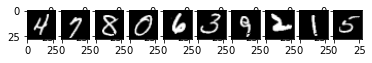

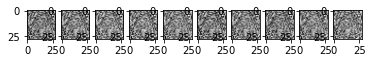

test loss: 65.3101
 Epoch 0, train loss: 107.0165, test loss: 19.2670


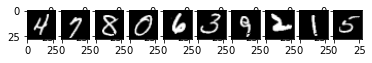

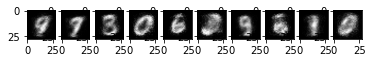

 Epoch 1, train loss: 69.6355, test loss: 15.9360


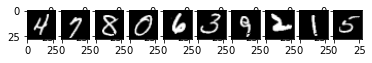

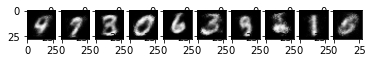

 Epoch 2, train loss: 60.8407, test loss: 14.5275


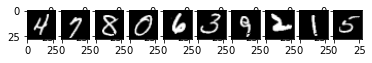

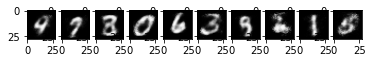

 Epoch 3, train loss: 56.7066, test loss: 13.8099
 Epoch 4, train loss: 54.5255, test loss: 13.3981
 Epoch 5, train loss: 53.1376, test loss: 13.1137
 Epoch 6, train loss: 52.1415, test loss: 12.8920
 Epoch 7, train loss: 51.4315, test loss: 12.7479
 Epoch 8, train loss: 50.9380, test loss: 12.6480
 Epoch 9, train loss: 50.6281, test loss: 12.5891


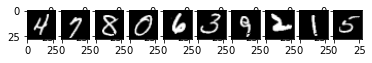

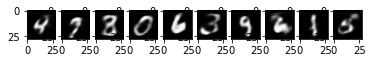

 Epoch 10, train loss: 50.4187, test loss: 12.5493
 Epoch 11, train loss: 50.2855, test loss: 12.5251
 Epoch 12, train loss: 50.1768, test loss: 12.5060
 Epoch 13, train loss: 50.1035, test loss: 12.4940
 Epoch 14, train loss: 50.0332, test loss: 12.4900
 Epoch 15, train loss: 49.9788, test loss: 12.4621
 Epoch 16, train loss: 49.9310, test loss: 12.4499
 Epoch 17, train loss: 49.8864, test loss: 12.4322
 Epoch 18, train loss: 49.8454, test loss: 12.4426
 Epoch 19, train loss: 49.8103, test loss: 12.4246


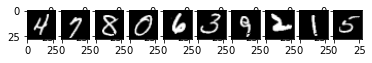

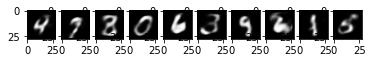

 Epoch 20, train loss: 49.7760, test loss: 12.4223
 Epoch 21, train loss: 49.7404, test loss: 12.4134
 Epoch 22, train loss: 49.7114, test loss: 12.3951
 Epoch 23, train loss: 49.6719, test loss: 12.3927
 Epoch 24, train loss: 49.6449, test loss: 12.3946
 Epoch 25, train loss: 49.6246, test loss: 12.3936
 Epoch 26, train loss: 49.6000, test loss: 12.3774
 Epoch 27, train loss: 49.5706, test loss: 12.3639
 Epoch 28, train loss: 49.5410, test loss: 12.3611
 Epoch 29, train loss: 49.5232, test loss: 12.3585


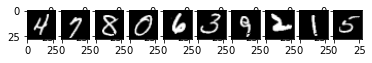

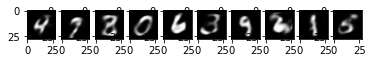

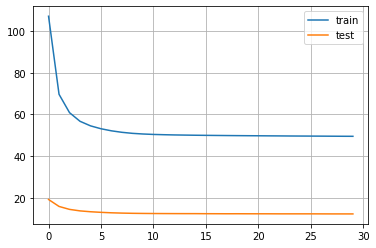

In [8]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


## Deep autoencoder

Three hidden layers

In [9]:
encoder = DeepEncoder(num_features=LATENT_DIM)
decoder = DeepDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

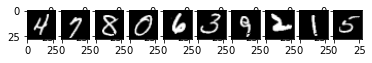

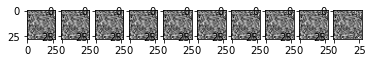

test loss: 65.1412
 Epoch 0, train loss: 107.7566, test loss: 22.4765


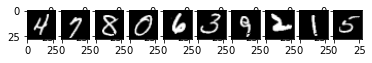

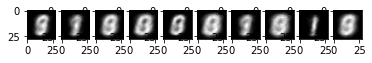

 Epoch 1, train loss: 81.1919, test loss: 17.9259


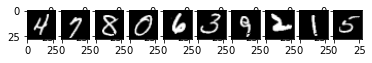

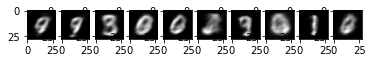

 Epoch 2, train loss: 67.5365, test loss: 15.9940


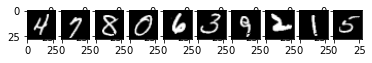

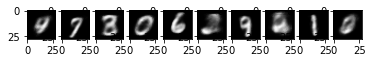

 Epoch 3, train loss: 62.3846, test loss: 15.1310
 Epoch 4, train loss: 59.4045, test loss: 14.3878
 Epoch 5, train loss: 56.6990, test loss: 13.9020
 Epoch 6, train loss: 55.0667, test loss: 13.5881
 Epoch 7, train loss: 53.8180, test loss: 13.2737
 Epoch 8, train loss: 52.7365, test loss: 13.0200
 Epoch 9, train loss: 51.4199, test loss: 12.6496


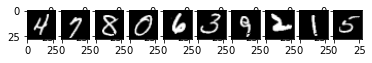

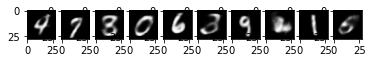

 Epoch 10, train loss: 50.0035, test loss: 12.3185
 Epoch 11, train loss: 48.9656, test loss: 12.1079
 Epoch 12, train loss: 48.2402, test loss: 11.9649
 Epoch 13, train loss: 47.6633, test loss: 11.8684
 Epoch 14, train loss: 47.2029, test loss: 11.7281
 Epoch 15, train loss: 46.8112, test loss: 11.6584
 Epoch 16, train loss: 46.4570, test loss: 11.5897
 Epoch 17, train loss: 46.2179, test loss: 11.5043
 Epoch 18, train loss: 45.9698, test loss: 11.4746
 Epoch 19, train loss: 45.7558, test loss: 11.4317


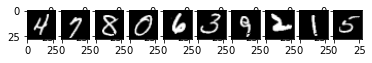

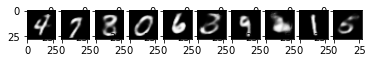

 Epoch 20, train loss: 45.5850, test loss: 11.3922
 Epoch 21, train loss: 45.4372, test loss: 11.3477
 Epoch 22, train loss: 45.2863, test loss: 11.3216
 Epoch 23, train loss: 45.1581, test loss: 11.2918
 Epoch 24, train loss: 45.0418, test loss: 11.2552
 Epoch 25, train loss: 44.9211, test loss: 11.2280
 Epoch 26, train loss: 44.8128, test loss: 11.2149
 Epoch 27, train loss: 44.7047, test loss: 11.1837
 Epoch 28, train loss: 44.6052, test loss: 11.1811
 Epoch 29, train loss: 44.5247, test loss: 11.1442


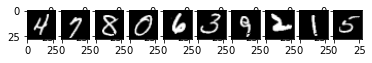

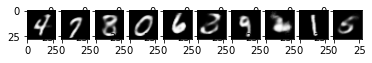

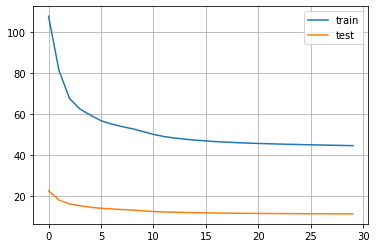

In [10]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


## Convolutional autoencoder

In [11]:
model = ConvAutoEncoder()
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_fn = torch.nn.BCELoss()

In [12]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


RuntimeError: Given groups=1, weight of size [4, 128, 3, 3], expected input[1, 4, 7, 7] to have 128 channels, but got 4 channels instead

## Convolutional autoencoder,  V2

In [7]:
model = ConvAutoEncoderV2()
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
/home/andrei/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


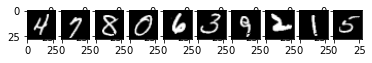

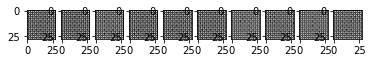

test loss: 60.2109
 Epoch 0, train loss: 113.2204, test loss: 15.3065


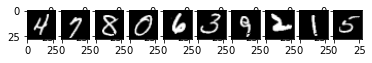

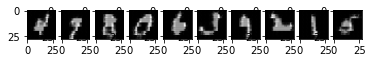

 Epoch 1, train loss: 51.8280, test loss: 12.1248


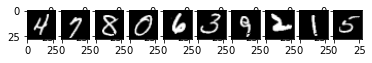

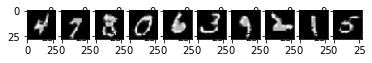

 Epoch 2, train loss: 47.5675, test loss: 11.6584


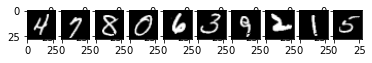

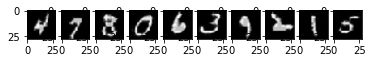

 Epoch 3, train loss: 46.0397, test loss: 11.2950
 Epoch 4, train loss: 44.5738, test loss: 10.9428
 Epoch 5, train loss: 43.1937, test loss: 10.6196
 Epoch 6, train loss: 41.9959, test loss: 10.3504
 Epoch 7, train loss: 40.9329, test loss: 10.0942
 Epoch 8, train loss: 40.0565, test loss: 9.9134
 Epoch 9, train loss: 39.4469, test loss: 9.7838


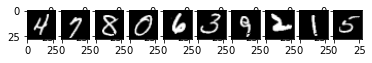

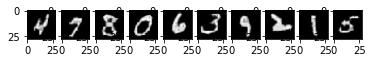

 Epoch 10, train loss: 39.0114, test loss: 9.6908
 Epoch 11, train loss: 38.6735, test loss: 9.6151
 Epoch 12, train loss: 38.3994, test loss: 9.5621
 Epoch 13, train loss: 38.1469, test loss: 9.4991
 Epoch 14, train loss: 37.9437, test loss: 9.4499
 Epoch 15, train loss: 37.7842, test loss: 9.4170
 Epoch 16, train loss: 37.6374, test loss: 9.3791
 Epoch 17, train loss: 37.5002, test loss: 9.3484
 Epoch 18, train loss: 37.3614, test loss: 9.3116
 Epoch 19, train loss: 37.2356, test loss: 9.2827


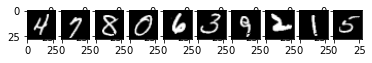

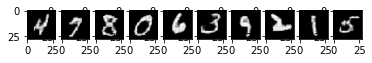

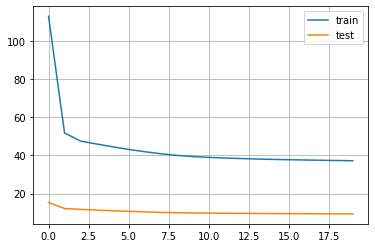

In [8]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


## Denoising with convolutional autoencoder v2

In [9]:
model = ConvAutoEncoderV2()
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
/home/andrei/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


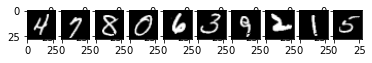

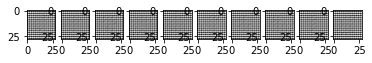

test loss: 62.1707
 Epoch 0, train loss: 140.8855, test loss: 30.5201


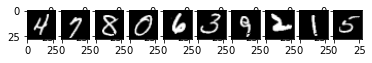

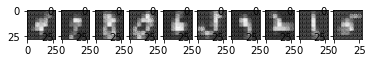

 Epoch 1, train loss: 98.0855, test loss: 21.7248


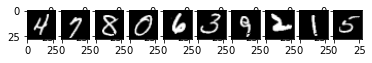

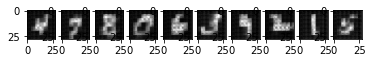

 Epoch 2, train loss: 84.2951, test loss: 20.5688


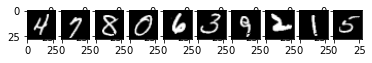

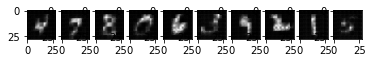

 Epoch 3, train loss: 81.1562, test loss: 19.9178
 Epoch 4, train loss: 78.8574, test loss: 19.4715
 Epoch 5, train loss: 77.2452, test loss: 19.0711
 Epoch 6, train loss: 75.8427, test loss: 18.8377
 Epoch 7, train loss: 75.0483, test loss: 18.7401
 Epoch 8, train loss: 74.6082, test loss: 18.5659
 Epoch 9, train loss: 74.1738, test loss: 18.5011


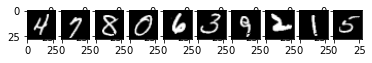

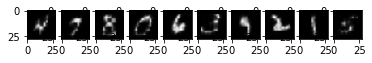

 Epoch 10, train loss: 73.9171, test loss: 18.4630
 Epoch 11, train loss: 73.6884, test loss: 18.3682
 Epoch 12, train loss: 73.3514, test loss: 18.3058
 Epoch 13, train loss: 73.2311, test loss: 18.2566
 Epoch 14, train loss: 72.9684, test loss: 18.1991
 Epoch 15, train loss: 72.8779, test loss: 18.1657
 Epoch 16, train loss: 72.8292, test loss: 18.1888
 Epoch 17, train loss: 72.7821, test loss: 18.1804
 Epoch 18, train loss: 72.6708, test loss: 18.1431
 Epoch 19, train loss: 72.5953, test loss: 18.1266


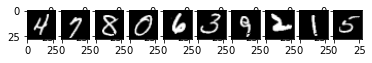

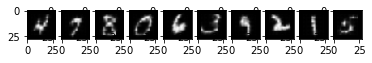

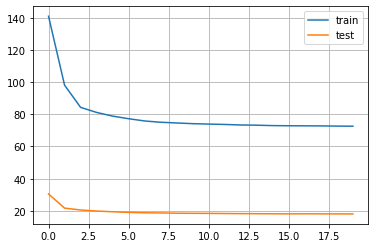

In [10]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)
